The Keras API is a beautifully designed and simple high-level API for building, training, evaluating and running neural networks. But don’t be fooled by its simplicity: it is expressive and flexible enough to let us build a wide variety of neural network architectures. In fact, it will probably be sufficient for most of our use cases. Moreover, should we ever need extra flexibility, we can always write custom Keras components using its lower-level API. 

To sum its capabilities up:

- There is now a huge quantity of data available to train neural networks, and ANNs frequently outperform other ML techniques on very large and complex problems.

- The tremendous increase in computing power since the 1990s now makes it pos‐ sible to train large neural networks in a reasonable amount of time.

- The training algorithms have been improved. To be fair they are only slightly different from the ones used in the 1990s, but these relatively small tweaks have a huge positive impact.

- Some theoretical limitations of ANNs have turned out to be benign in practice. For example, many people thought that ANN training algorithms were doomed because they were likely to get stuck in local optima, but it turns out that this is rather rare in practice (or when it is the case, they are usually fairly close to the global optimum).

- ANNs seem to have entered a virtuous circle of funding and progress. Amazing products based on ANNs regularly make the headline news, which pulls more and more attention and funding toward them, resulting in more and more pro‐ gress, and even more amazing products.

##### Logical computations with neurons

Warren McCulloch and Walter Pitts proposed a very simple model of the biological neuron, which later became known as an artificial neuron: it has one or more binary (on/off) inputs and one binary output. The artificial neuron simply activates its output when more than a certain number of its inputs are active.

##### The perceptron

The Perceptron is one of the simplest ANN architectures, invented in 1957 by Frank Rosenblatt. It is based on a slightly different artificial neuron called a threshold logic unit (TLU), or sometimes a linear threshold unit (LTU): the inputs and output are now numbers (instead of binary on/off values) and each input con‐ nection is associated with a weight.

A single TLU can be used for simple linear binary classification. It computes a linear combination of the inputs and if the result exceeds a threshold, it outputs the positive class or else outputs the negative class (just like a Logistic Regression classifier or a linear SVM).

A Perceptron is simply composed of a single layer of TLUs, with each TLU connected to all the inputs. When all the neurons in a layer are connected to every neuron in the previous layer (i.e., its input neurons), it is called a fully connected layer or a dense layer. To represent the fact that each input is sent to every TLU, it is common to draw special passthrough neurons called input neurons: they just output whatever input they are fed. All the input neurons form the input layer. Moreover, an extra bias feature is generally added (x0 = 1): it is typically represented using a special type of neuron called a bias neuron, which just outputs 1 all the time.

A Perceptron with two inputs and three outputs can classify instances simultaneously into three different binary classes, which makes it a multi‐output classifier.

Using Hebbian learning, that is, the connection weight between two neurons is increased whenever they have the same output, perceptrons are trained using a variant of this rule that takes into account the error made by the network; it reinforces connections that help reduce the error. More specifically, the Perceptron is fed one training instance at a time, and for each instance it makes its predictions.

For every output neuron that produced a wrong prediction, it reinforces the connection weights from the inputs that would have contributed to the correct prediction. 

In [1]:
# tensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0" 

# common imports
import numpy as np
import os

# output stable across runs
np.random.seed(42)

# plotting
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
from sklearn.datasets import load_iris 
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)] # petal length, petal width
y = (iris.target==0).astype(np.int) # iris setosa?

In [3]:
per_clf = Perceptron()
per_clf.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [4]:
y_pred = per_clf.predict([[2, 0.5]])

Scikit-Learn’s Perceptron class is equivalent to using an SGDClassifier with the following hyperparameters: loss="perceptron", learning_rate="constant", eta0=1 (the learning rate), and penalty=None (no regularization).

Note that contrary to Logistic Regression classifiers, Perceptrons do not output a class probability; rather, they just make predictions based on a hard threshold. This is one of the good reasons to prefer Logistic Regression over Perceptrons.

Some of the limitations of Perceptrons can be eliminated by stacking multiple Perceptrons. The resulting ANN is called a Multi-Layer Perceptron (MLP).

##### Multilayer perceptron and backpropagation

An MLP is composed of one (passthrough) input layer, one or more layers of TLUs, called hidden layers, and one final layer of TLUs called the output layer. The layers close to the input layer are usually called the lower layers, and the ones close to the outputs are usually called the upper layers. Every layer except the output layer includes a bias neuron and is fully connected to the next layer.

When an ANN contains a deep stack of hidden layers8, it is called a deep neural net‐ work (DNN). The field of Deep Learning studies DNNs, and more generally models containing deep stacks of computations. However, many people talk about Deep Learning whenever neural networks are involved (even shallow ones).

In short, Backpropagation is simply Gradient Descent using an efficient technique for computing the gradients automatically: in just two passes through the network (one forward, one backward), the backpropagation algorithm is able to compute the gradient of the network’s error with regards to every single model parameter.

This algorithm is so important, it’s worth summarizing it again: for each training instance the backpropagation algorithm first makes a prediction (forward pass), measures the error, then goes through each layer in reverse to measure the error contribution from each connection (reverse pass), and finally slightly tweaks the connection weights to reduce the error (Gradient Descent step).

##### Regression multilayer perceptrons

In general, when building an MLP for regression, you do not want to use any activation function for the output neurons, so they are free to output any range of values. However, if you want to guarantee that the output will always be positive, then you can use the ReLU activation function, or the softplus activation function in the output layer. Finally, if you want to guarantee that the predictions will fall within a given range of values, then you can use the logistic function or the hyperbolic tangent, and scale the labels to the appropriate range: 0 to 1 for the logistic function, or –1 to 1 for the hyperbolic tangent.

The loss function to use during training is typically the mean squared error, but if you have a lot of outliers in the training set, you may prefer to use the mean absolute error instead. Alternatively, you can use the Huber loss, which is a combination of both.

##### Classification multilayer perceptrons

For a binary classification problem, you just need a single output neuron using the logistic activation function: the output will be a number between 0 and 1, which you can interpret as the estimated probability of the positive class. Obviously, the estimated probability of the negative class is equal to one minus that number.

## 1. MLP with Keras



In [5]:
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

2.0.0-rc1
2.2.4-tf


##### Building an image classifier using the sequential API

We will tackle Fashion MNIST, which is a drop-in replacement of MNIST. It has the exact same format as MNIST (70,000 grayscale images of 28×28 pixels each, with 10 classes), but the images represent fashion items rather than handwritten digits, so each class is more diverse and the problem turns out to be significantly more challenging than MNIST.



In [6]:
# loading the dataset
fashion = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion.load_data()

When loading MNIST or Fashion MNIST using Keras rather than Scikit-Learn, one important difference is that every image is represented as a 28×28 array rather than a 1D array of size 784. Moreover, the pixel intensities are represented as integers (from 0 to 255) rather than floats (from 0.0 to 255.0).

In [7]:
# data shape & types
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


Note that the dataset is already split into a training set and a test set, but there is no validation set, so let’s create one. Moreover, since we are going to train the neural net‐ work using Gradient Descent, we must scale the input features. For simplicity, we just scale the pixel intensities down to the 0-1 range by dividing them by 255.0 (this will convert them to floats)

In [8]:
X_valid, X_train = X_train_full[: 5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

For this fashion MNIST, we need the list of class names to know what we are dealing with:

In [9]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

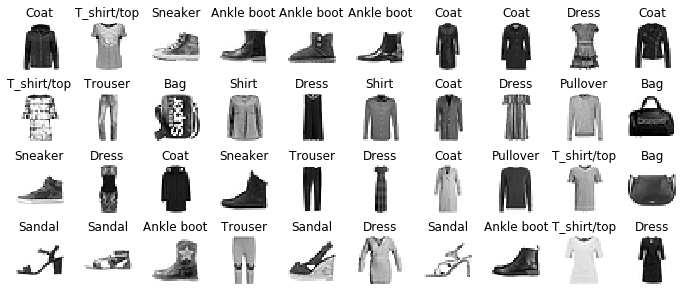

In [10]:
# let's have a look
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

##### Creating the model using the sequential API

Just a classification MLP with two hidden layers.


In [11]:
model = keras.models.Sequential() # creates a Sequential model

model.add(keras.layers.Flatten(input_shape=[28, 28])) # first layer to the model. 
                                                      # It is a Flatten layer whose role is simply to convert 
                                                      # each input image into a 1D array.
                                                      # receives input data X, computes X.reshape(-1, 1)

model.add(keras.layers.Dense(300, activation='relu')) # hidden layer with 300 neurons. Uses the ReLU act.funct.
                                                      
model.add(keras.layers.Dense(100, activation='relu')) # second hidden layer with 100 neurons.

model.add(keras.layers.Dense(10, activation='softmax')) # Dense output layer with 10 neurons (one per class), 
                                                        # using the softmax activation function 
                                                        # (because the classes are exclusive).

In [12]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

A cleaner way to do the same:

In [13]:
model = keras.models.Sequential([ 
    keras.layers.Flatten(input_shape=[28, 28]), 
    keras.layers.Dense(300, activation="relu"), 
    keras.layers.Dense(100, activation="relu"), 
    keras.layers.Dense(10, activation="softmax")
])

Next, a summary of the model’s layers, including each layer’s name (which is automatically generated unless you set it when creating the layer), its output shape (None means the batch size can be anything), and its number of parame‐ ters. The summary ends with the total number of parameters, including trainable and non-trainable parameters. Here we only have trainable parameters.

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Dense layers often have a lot of parameters. For example, the first hidden layer has 784 × 300 connection weights, plus 300 bias terms, which adds up to 235,500 parameters. This gives the model quite a lot of flexibility to fit the training data, but it also means that the model runs the risk of overfitting, especially when you do not have a lot of training data.

In [15]:
model.layers

In [16]:
# model schematic
# keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

All the parameters of a layer can be accessed using its get_weights() and set_weights() method. For a Dense layer, this includes both the connection weights and the bias terms.

In [17]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [18]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

##### Compiling the model

In [19]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

First, we use the "sparse_categorical_crossen tropy" loss because we have sparse labels (i.e., for each instance there is just a target class index, from 0 to 9 in this case), and the classes are exclusive. If instead we had one target probability per class for each instance (such as one-hot vectors, e.g. [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.] to represent class 3), then we would need to use the "categorical_crossentropy" loss instead. If we were doing binary classi‐ fication (with one or more binary labels), then we would use the "sigmoid" (i.e., logistic) activation function in the output layer instead of the "softmax" activation function, and we would use the "binary_crossentropy" loss.

Secondly, regarding the optimizer, "sgd" simply means that we will train the model using simple Stochastic Gradient Descent.

Finally, since this is a classifier, it’s useful to measure its "accuracy" during training and evaluation.

##### Training and evaluating the model

Passing validation set is optional.

In [20]:
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 7s 121us/sample - loss: 0.7228 - accuracy: 0.7623 - val_loss: 0.5304 - val_accuracy: 0.8162
Epoch 2/30
55000/55000 [==============================] - 6s 102us/sample - loss: 0.4838 - accuracy: 0.8324 - val_loss: 0.4496 - val_accuracy: 0.8452
Epoch 3/30
55000/55000 [==============================] - 6s 103us/sample - loss: 0.4380 - accuracy: 0.8469 - val_loss: 0.4175 - val_accuracy: 0.8552
Epoch 4/30
55000/55000 [==============================] - 6s 107us/sample - loss: 0.4127 - accuracy: 0.8557 - val_loss: 0.3900 - val_accuracy: 0.8658
Epoch 5/30
55000/55000 [==============================] - 6s 110us/sample - loss: 0.3930 - accuracy: 0.8624 - val_loss: 0.3981 - val_accuracy: 0.8624
Epoch 6/30
55000/55000 [==============================] - 6s 110us/sample - loss: 0.3776 - accuracy: 0.8671 - val_loss: 0.3738 - val_accuracy: 0.8736
Epoch 7/30
55000/55000 [===========================

In [21]:
history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

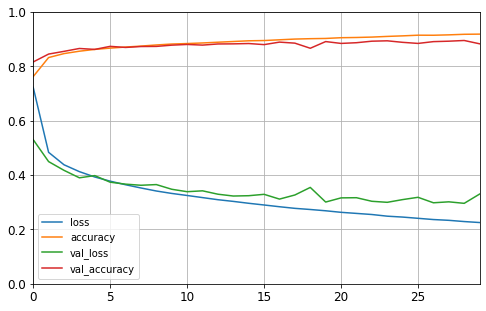

In [22]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # vertical range [0, 1]
plt.show()

You can see that both the training and validation accuracy steadily increase during training, while the training and validation loss decrease. Moreover, the valida‐ tion curves are quite close to the training curves, which means that there is not too much overfitting.

The model performed better on the validation set than on the training set at the beginning of training: this sometimes happens by chance (especially when the validation set is fairly small). However, the training set performance ends up beating the validation performance, as is generally the case when you train for long enough.

Once we are satisfied with your model’s validation accuracy, we should evaluate it on the test set to estimate the generalization error before you deploy the model to production.

In [23]:
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[56.05914338197569, 0.8568]

It is common to get slightly lower performance on the test set than on the validation set, because the hyperparameters are tuned on the validation set, not the test set (however, in this example, we did not do any hyperparameter tuning, so the lower accuracy is just bad luck). 

##### Making predictions

Since we don’t have actual new instances, we will just use the first 3 instances of the test set:

In [24]:
X_new = X_test[:3]
y_proba = model.predict(X_new)

y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [25]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [26]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [27]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

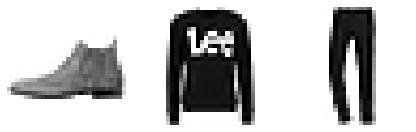

In [28]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
   # plt.title(class_names[y_test], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

##### Building a regression MLP using the sequential API

Using California housing problem.

In [29]:
from sklearn.datasets import fetch_california_housing 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [30]:
np.random.seed(42)
tf.random.set_seed(42)

The main differences with the classifier above are the fact that the output layer has a single neuron (since we only want to predict a single value) and uses no activation function, and the loss function is the mean squared error.

Since the dataset is quite noisy, we just use a single hidden layer with fewer neurons than before, to avoid overfitting.

In [31]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 100us/sample - loss: 1.6321 - val_loss: 1.5903
Epoch 2/20
11610/11610 [==============================] - 1s 57us/sample - loss: 0.7124 - val_loss: 0.6539
Epoch 3/20
11610/11610 [==============================] - 1s 59us/sample - loss: 0.6348 - val_loss: 0.6039
Epoch 4/20
11610/11610 [==============================] - 1s 53us/sample - loss: 0.5983 - val_loss: 0.5738
Epoch 5/20
11610/11610 [==============================] - 1s 52us/sample - loss: 0.5713 - val_loss: 0.5406
Epoch 6/20
11610/11610 [==============================] - 1s 52us/sample - loss: 0.5482 - val_loss: 0.5221
Epoch 7/20
11610/11610 [==============================] - 1s 52us/sample - loss: 0.5298 - val_loss: 0.4965
Epoch 8/20
11610/11610 [==============================] - 1s 51us/sample - loss: 0.5138 - val_loss: 0.4843
Epoch 9/20
11610/11610 [==============================] - 1s 51us/sample - loss: 0.5005 - val_

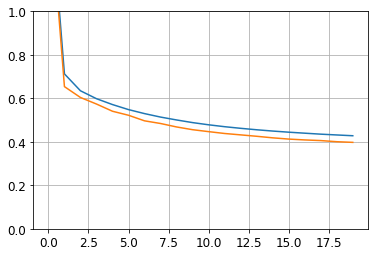

In [32]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## 2. Functional API

This architecture makes it possible for the neural network to learn both deep patterns (using the deep path) and simple rules (through the short path). In contrast, a regular MLP forces all the data to flow through the full stack of layers, thus simple patterns in the data may end up being distorted by this sequence of transformations.



In [33]:
input = keras.layers.Input(shape=X_train.shape[1:]) # First, we need to create an Input object
hidden1 = keras.layers.Dense(30, activation="relu")(input) # Next, Dense layer with 30 neurons nad relu act. fucn.
                                                           # As soon as it is created, notice that we call it like 
                                                           # a function, passing it the input.
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1) # second layer, with output of first hidden layer
concat = keras.layers.Concatenate()([input, hidden2]) # Concatenate() layer 
output = keras.layers.Dense(1)(concat) # output layer, with a single neuron and no activation function
model = keras.models.Model(inputs=[input], outputs=[output]) # model

But what if we want to send a subset of the features through the wide path, and a different subset (possibly overlapping) through the deep path (see Figure 10-14)? In this case, one solution is to use multiple inputs. For example, suppose we want to send 5 features through the deep path (features 0 to 4), and 6 features through the wide path (features 2 to 7):

In [34]:
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

Now we can compile the model as usual, but when we call the fit() method, instead of passing a single input matrix X_train, we must pass a pair of matrices (X_train_A, X_train_B): one per input. The same is true for X_valid, and also for X_test and X_new when you call evaluate() or predict().

In [35]:
model.compile(loss="mse", optimizer="sgd")

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:] 
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:] 
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:] 
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [36]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=20, 
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test) 
y_pred = model.predict((X_new_A, X_new_B))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 90us/sample - loss: 0.7341 - val_loss: 0.8651
Epoch 2/20
11610/11610 [==============================] - 1s 59us/sample - loss: 0.5143 - val_loss: 1.6539
Epoch 3/20
11610/11610 [==============================] - 1s 60us/sample - loss: 0.4685 - val_loss: 3.7008
Epoch 4/20
11610/11610 [==============================] - 1s 63us/sample - loss: 0.4684 - val_loss: 0.5585
Epoch 5/20
11610/11610 [==============================] - 1s 56us/sample - loss: 0.4338 - val_loss: 0.4293
Epoch 6/20
11610/11610 [==============================] - 1s 73us/sample - loss: 0.4199 - val_loss: 0.3765
Epoch 7/20
11610/11610 [==============================] - 1s 65us/sample - loss: 0.4185 - val_loss: 0.3880
Epoch 8/20
11610/11610 [==============================] - 1s 59us/sample - loss: 0.4170 - val_loss: 0.3768
Epoch 9/20
11610/11610 [==============================] - 1s 64us/sample - loss: 0.4109 - val_l

Adding an auxiliary output for regularization:

In [40]:
np.random.seed(42)
tf.random.set_seed(42)

In [41]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [42]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

In [43]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 119us/sample - loss: 2.1329 - main_output_loss: 1.9166 - aux_output_loss: 4.0719 - val_loss: 2.2885 - val_main_output_loss: 1.5657 - val_aux_output_loss: 8.7861
Epoch 2/20
11610/11610 [==============================] - 1s 69us/sample - loss: 0.8910 - main_output_loss: 0.6989 - aux_output_loss: 2.6202 - val_loss: 1.4258 - val_main_output_loss: 0.6285 - val_aux_output_loss: 8.5972
Epoch 3/20
11610/11610 [==============================] - 1s 68us/sample - loss: 0.7397 - main_output_loss: 0.6064 - aux_output_loss: 1.9374 - val_loss: 1.3894 - val_main_output_loss: 0.5941 - val_aux_output_loss: 8.5417
Epoch 4/20
11610/11610 [==============================] - 1s 68us/sample - loss: 0.6746 - main_output_loss: 0.5684 - aux_output_loss: 1.6301 - val_loss: 1.3275 - val_main_output_loss: 0.6028 - val_aux_output_loss: 7.8451
Epoch 5/20
11610/11610 [==============================] - 1s 69us/

In [44]:
total_loss, main_loss, aux_loss = model.evaluate( [X_test_A, X_test_B], [y_test, y_test])

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [46]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])
print(y_pred_main)
print(y_pred_aux)

[[0.25949985]
 [1.9820838 ]
 [3.333793  ]]
[[0.95263696]
 [1.9273019 ]
 [2.5151913 ]]


## 3. Subclassing API

Both the Sequential API and the Functional API are declarative: we start by declaring which layers we want to use and how they should be connected, and only then can you start feeding the model some data for training or inference.

This has many advantages: the model can easily be saved, cloned, shared, its structure can be displayed and analyzed, the framework can infer shapes and check types, so errors can be caught early (i.e., before any data ever goes through the model).

But the flip side is just that: it’s static. Some models involve loops, varying shapes, conditional branching, and other dynamic behaviors. For such cases, or simply if we prefer a more imperative programming style, the Subclassing API is for us.

We subclass the Model class, create the layers we need in the constructor, and use them to perform the computations we want in the call() method.

In [49]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs) # handles standard args (e.g, name)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    
model = WideAndDeepModel(30, activation='relu')

This example looks very much like the Functional API, except we do not need to create the inputs, we just use the input argument to the call() method, and we separate the creation of the layers in the constructor from their usage in the call() method.

The big difference is that we can do pretty much anything you want in the call() method: for loops, if statements, low-level TensorFlow operations; imagination is the limit.

However, this extra flexibility comes at a cost: our model’s architecture is hidden within the call() method, so Keras cannot easily inspect it, it cannot save or clone it, and when we call the summary() method, we only get a list of layers, without any information on how they are connected to each other. Moreover, Keras cannot check types and shapes ahead of time, and it is easier to make mistakes.

In [51]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 120us/sample - loss: 2.2968 - output_1_loss: 2.1826 - output_2_loss: 3.3166 - val_loss: 3.0093 - val_output_1_loss: 1.5519 - val_output_2_loss: 16.1139
Epoch 2/10
11610/11610 [==============================] - 1s 67us/sample - loss: 0.9760 - output_1_loss: 0.8529 - output_2_loss: 2.0834 - val_loss: 1.9291 - val_output_1_loss: 0.7524 - val_output_2_loss: 12.5119
Epoch 3/10
11610/11610 [==============================] - 1s 65us/sample - loss: 0.8288 - output_1_loss: 0.7270 - output_2_loss: 1.7431 - val_loss: 1.6768 - val_output_1_loss: 0.7256 - val_output_2_loss: 10.2305
Epoch 4/10
11610/11610 [==============================] - 1s 65us/sample - loss: 0.7637 - output_1_loss: 0.6744 - output_2_loss: 1.5665 - val_loss: 1.4544 - val_output_1_loss: 0.6860 - val_output_2_loss: 8.3638
Epoch 5/10
11610/11610 [==============================] - 1s 65us/sample - loss: 0.7227 - output_1_loss

In [52]:
model.summary()

Model: "wide_and_deep_model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             multiple                  210       
_________________________________________________________________
dense_20 (Dense)             multiple                  930       
_________________________________________________________________
dense_21 (Dense)             multiple                  36        
_________________________________________________________________
dense_22 (Dense)             multiple                  31        
Total params: 1,207
Trainable params: 1,207
Non-trainable params: 0
_________________________________________________________________


##### Saving models



In [53]:
#model.save('keras_model_1.h5')

Keras will save both the model’s architecture (including every layer’s hyperparameters) and the value of all the model parameters for every layer (e.g., connection weights and biases), using the HDF5 format. It also saves the optimizer (including its hyperparameters and any state it may have).

We will typically have a script that trains a model and saves it, and one or more scripts (or web services) that load the model and use it to make predictions. Loading the model is just as easy:


In [54]:
# model = keras.models.load_model('keras_model_1.h5')

##### Using callbacks

What if training lasts several hours? This is quite common, especially when training on large datasets. In this case, we should not only save your model at the end of training, but also save checkpoints at regular intervals during training.

The fit() method accepts a callbacks argument that lets you specify a list of objects that Keras will call during training at the start and end of training, at the start and end of each epoch and even before and after processing each batch.



In [55]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [56]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

Moreover, if we use a validation set during training, we can set save_best_only=True when creating the ModelCheckpoint. In this case, it will only save your model when its performance on the validation set is the best so far. This way, we do not need to worry about training for too long and overfitting the training set: simply restore the last model saved after training, and this will be the best model on the validation set.

In [59]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 86us/sample - loss: 0.3465 - val_loss: 0.3825
Epoch 2/10
11610/11610 [==============================] - 1s 65us/sample - loss: 0.3463 - val_loss: 0.3262
Epoch 3/10
11610/11610 [==============================] - 1s 61us/sample - loss: 0.3457 - val_loss: 0.3445
Epoch 4/10
11610/11610 [==============================] - 1s 63us/sample - loss: 0.3450 - val_loss: 0.3318
Epoch 5/10
11610/11610 [==============================] - 1s 63us/sample - loss: 0.3445 - val_loss: 0.3271
Epoch 6/10
11610/11610 [==============================] - 1s 66us/sample - loss: 0.3439 - val_loss: 0.3637
Epoch 7/10
11610/11610 [==============================] - 1s 67us/sample - loss: 0.3434 - val_loss: 0.3252
Epoch 8/10
11610/11610 [==============================] - 1s 71us/sample - loss: 0.3430 - val_loss: 0.3951
Epoch 9/10
11610/11610 [==============================] - 1s 56us/sample - loss: 0.3426 - val_l

Another way to implement early stopping is to simply use the EarlyStopping callback. It will interrupt training when it measures no progress on the validation set for a number of epochs (defined by the patience argument), and it will optionally roll back to the best model.

The number of epochs can be set to a large value since training will stop automatically when there is no more progress. Moreover, there is no need to restore the best model saved in this case since the EarlyStopping callback will keep track of the best weights and restore them for us at the end of training.

In [60]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 85us/sample - loss: 0.3429 - val_loss: 0.3946
Epoch 2/100
11610/11610 [==============================] - 1s 56us/sample - loss: 0.3428 - val_loss: 0.3242
Epoch 3/100
11610/11610 [==============================] - 1s 54us/sample - loss: 0.3421 - val_loss: 0.3454
Epoch 4/100
11610/11610 [==============================] - 1s 60us/sample - loss: 0.3415 - val_loss: 0.3275
Epoch 5/100
11610/11610 [==============================] - 1s 57us/sample - loss: 0.3410 - val_loss: 0.3247
Epoch 6/100
11610/11610 [==============================] - 1s 56us/sample - loss: 0.3405 - val_loss: 0.3617
Epoch 7/100
11610/11610 [==============================] - 1s 57us/sample - loss: 0.3400 - val_loss: 0.3242
Epoch 8/100
11610/11610 [==============================] - 1s 56us/sample - loss: 0.3398 - val_loss: 0.3983
Epoch 9/100
11610/11610 [==============================] - 1s 57us/sample - loss: 0.339

Epoch 76/100
11610/11610 [==============================] - 1s 62us/sample - loss: 0.3173 - val_loss: 0.3219
Epoch 77/100
11610/11610 [==============================] - 1s 58us/sample - loss: 0.3173 - val_loss: 0.3176
Epoch 78/100
11610/11610 [==============================] - 1s 57us/sample - loss: 0.3167 - val_loss: 0.3890
Epoch 79/100
11610/11610 [==============================] - 1s 57us/sample - loss: 0.3170 - val_loss: 0.3051
Epoch 80/100
11610/11610 [==============================] - 1s 65us/sample - loss: 0.3163 - val_loss: 0.3995
Epoch 81/100
11610/11610 [==============================] - 1s 66us/sample - loss: 0.3165 - val_loss: 0.3750
Epoch 82/100
11610/11610 [==============================] - 1s 58us/sample - loss: 0.3162 - val_loss: 0.4370
Epoch 83/100
11610/11610 [==============================] - 1s 64us/sample - loss: 0.3162 - val_loss: 0.3480
Epoch 84/100
11610/11610 [==============================] - 1s 66us/sample - loss: 0.3156 - val_loss: 0.3912
Epoch 85/100
11610/

In [61]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [62]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

Train on 11610 samples, validate on 3870 samples
11456/11610 [============================>.] - ETA: 0s - loss: 0.3098
val/train: 1.24
11610/11610 [==============================] - 1s 58us/sample - loss: 0.3106 - val_loss: 0.3851


##### Visualization using TensorBoard

TensorBoard is an interactive visualization tool that you can use to view the learning curves during training, compare learning curves between multiple runs, visualize the computation graph, analyze training statistics, view images generated by your model, visualize complex multidimensional data projected down to 3D and automatically clustered for you, and more.

To use it, we must modify our program so that it outputs the data we want to visualize to special binary log files called event files. Each binary data record is called a summary. The TensorBoard server will monitor the log directory, and it will automatically pick up the changes and update the visualizations: this allows you to visualize live data (with a short delay), such as the learning curves during training.

In general, we want to point the TensorBoard server to a root log directory, and configure our program so that it writes to a different subdirectory every time it runs. This way, the same TensorBoard server instance will allow us to visualize and compare data from multiple runs of your program, without getting everything mixed up.

Let’s start by defining the root log directory we will use for our TensorBoard logs, plus a small function that will generate a subdirectory path based on the current date and time, so that it is different at every run.

In [63]:
root_logdir = os.path.join(os.curdir, "my_logs")

In [64]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

In [66]:
run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2020_02_06-09_48_38'

In [67]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [68]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [69]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 1s 96us/sample - loss: 1.8631 - val_loss: 3.2403
Epoch 2/30
11610/11610 [==============================] - 1s 63us/sample - loss: 0.6723 - val_loss: 0.6939
Epoch 3/30
11610/11610 [==============================] - 1s 70us/sample - loss: 0.5927 - val_loss: 0.5531
Epoch 4/30
11610/11610 [==============================] - 1s 74us/sample - loss: 0.5550 - val_loss: 0.5519
Epoch 5/30
11610/11610 [==============================] - 1s 73us/sample - loss: 0.5278 - val_loss: 0.5715
Epoch 6/30
11610/11610 [==============================] - 1s 59us/sample - loss: 0.5032 - val_loss: 0.5591
Epoch 7/30
11610/11610 [==============================] - 1s 56us/sample - loss: 0.4863 - val_loss: 0.4593
Epoch 8/30
11610/11610 [==============================] - 1s 52us/sample - loss: 0.4701 - val_loss: 0.4651
Epoch 9/30
11610/11610 [==============================] - 1s 77us/sample - loss: 0.4586 - val_l

The TensorBoard callback will take care of creating the log directory for us (along with its parent directories if needed), and during training it will create event files and write summaries to them.

Next, run the following command at the root of the project (or from anywhere else as long as we point to the appropriate log directory).

In [71]:
#%load_ext tensorboard
#%tensorboard --logdir=./my_logs --port=6006

## 4. Fine-tuning NN hyperparameters

The flexibility of neural networks is also one of their main drawbacks: there are many hyperparameters to tweak. Not only can we use any imaginable network architecture, but even in a simple MLP you can change the number of layers, the number of neurons per layer, the type of activation function to use in each layer, the weight initialization logic, and much more.

One option is to simply try many combinations of hyperparameters and see which one works best on the validation set (or using K-fold cross-validation). For this, one approach is simply use GridSearchCV or RandomizedSearchCV to explore the hyperparameter space.

The first step is to create a function that will build and compile a Keras model, given a set of hyperparameters:

In [73]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    options = {'input_shape': input_shape}
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu', **options))
        options = {}
    model.add(keras.layers.Dense(1, **options))
    optimizer = keras.optimizers.SGD(learning_rate)
    model.compile(loss='mse', optimizer=optimizer)
    return model

This function creates a simple Sequential model for univariate regression (only one output neuron), with the given input shape and the given number of hidden layers and neurons, and it compiles it using an SGD optimizer configured with the given learning rate.

The options dict is used to ensure that the first layer is properly given the input shape (note that if n_hidden=0, the first layer will be the output layer).

In [74]:
# create a KerasRegressor based on this build_model() function
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

The KerasRegressor object is a thin wrapper around the Keras model built using build_model(). Since we did not specify any hyperparameter when creating it, it will just use the default hyperparameters we defined in build_model().

In [75]:
keras_reg.fit(X_train, y_train, epochs=100, 
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)]) 
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 84us/sample - loss: 1.1574 - val_loss: 10.5647
Epoch 2/100
11610/11610 [==============================] - 1s 53us/sample - loss: 0.6511 - val_loss: 0.5245
Epoch 3/100
11610/11610 [==============================] - 1s 53us/sample - loss: 0.5236 - val_loss: 0.4755
Epoch 4/100
11610/11610 [==============================] - 1s 53us/sample - loss: 0.4881 - val_loss: 0.4512
Epoch 5/100
11610/11610 [==============================] - 1s 53us/sample - loss: 0.4650 - val_loss: 0.4518
Epoch 6/100
11610/11610 [==============================] - 1s 57us/sample - loss: 0.4489 - val_loss: 0.4733
Epoch 7/100
11610/11610 [==============================] - 1s 57us/sample - loss: 0.4371 - val_loss: 0.4522
Epoch 8/100
11610/11610 [==============================] - 1s 54us/sample - loss: 0.4293 - val_loss: 0.4872
Epoch 9/100
11610/11610 [==============================] - 1s 68us/sample - loss: 0.42

In [76]:
mse_test = keras_reg.score(X_test, y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

However, we do not actually want to train and evaluate a single model like this, we want to train hundreds of variants and see which one performs best on the validation set. Since there are many hyperparameters, it is preferable to use a randomized search rather than grid search.

In [79]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs ={
    'n_hidden': [0, 1, 2, 3],
    'n_neurons': np.arange(0, 100),
    'learning_rate': reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100, 
                 validation_data=(X_valid, y_valid),
                 callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 96us/sample - loss: 3.8372 - val_loss: 1.6990
Epoch 2/100
7740/7740 [==============================] - 0s 58us/sample - loss: 1.1128 - val_loss: 0.7196
Epoch 3/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.6775 - val_loss: 0.5656
Epoch 4/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.5868 - val_loss: 0.7843
Epoch 5/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.5699 - val_loss: 0.5218
Epoch 6/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.5582 - val_loss: 0.6834
Epoch 7/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.5559 - val_loss: 0.6232
Epoch 8/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.5527 - val_loss: 0.5331
Epoch 9/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.5485 - val_loss: 0.597

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 93us/sample - loss: 3.6970 - val_loss: 2.0041
Epoch 2/100
7740/7740 [==============================] - 0s 57us/sample - loss: 1.2674 - val_loss: 0.9298
Epoch 3/100
7740/7740 [==============================] - 1s 72us/sample - loss: 0.8149 - val_loss: 1.5867
Epoch 4/100
7740/7740 [==============================] - 1s 70us/sample - loss: 0.7007 - val_loss: 2.9970
Epoch 5/100
7740/7740 [==============================] - 1s 72us/sample - loss: 0.6569 - val_loss: 4.6773
Epoch 6/100
7740/7740 [==============================] - 1s 72us/sample - loss: 0.6311 - val_loss: 6.4572
Epoch 7/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.6117 - val_loss: 8.3585
Epoch 8/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.5960 - val_loss: 10.1397
Epoch 9/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.5827 - val_loss: 11.8

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 95us/sample - loss: 4.5092 - val_loss: 2.0881
Epoch 2/100
7740/7740 [==============================] - 0s 57us/sample - loss: 1.3712 - val_loss: 1.0780
Epoch 3/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.8278 - val_loss: 0.7359
Epoch 4/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.7094 - val_loss: 0.6788
Epoch 5/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.6740 - val_loss: 0.7710
Epoch 6/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.6531 - val_loss: 1.0124
Epoch 7/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.6435 - val_loss: 0.7093
Epoch 8/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.6295 - val_loss: 0.7396
Epoch 9/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.6187 - val_loss: 0.802

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 117us/sample - loss: 2.3342 - val_loss: 287.6812
Epoch 2/100
7740/7740 [==============================] - 0s 54us/sample - loss: 2.5636 - val_loss: 1772.8360
Epoch 3/100
7740/7740 [==============================] - 0s 63us/sample - loss: 13.5234 - val_loss: 5746.3854
Epoch 4/100
7740/7740 [==============================] - 0s 60us/sample - loss: 136.8014 - val_loss: 22293.6450
Epoch 5/100
7740/7740 [==============================] - 0s 63us/sample - loss: 84.5179 - val_loss: 84276.5243
Epoch 6/100
7740/7740 [==============================] - 0s 56us/sample - loss: 963.0286 - val_loss: 327485.3184
Epoch 7/100
7740/7740 [==============================] - 0s 62us/sample - loss: 2832.8591 - val_loss: 1280873.9936
Epoch 8/100
7740/7740 [==============================] - 0s 56us/sample - loss: 7534.7987 - val_loss: 5105569.3062
Epoch 9/100
7740/7740 [==============================] - 1

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 119us/sample - loss: 1.6267 - val_loss: 1.9797
Epoch 2/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.5817 - val_loss: 11.9434
Epoch 3/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.5375 - val_loss: 18.6734
Epoch 4/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.5195 - val_loss: 22.5630
Epoch 5/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.5118 - val_loss: 20.4271
Epoch 6/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.5072 - val_loss: 18.4663
Epoch 7/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.5049 - val_loss: 21.0818
Epoch 8/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.5030 - val_loss: 20.4311
Epoch 9/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.5038 - val_los

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 89us/sample - loss: 1.5021 - val_loss: 0.7113
Epoch 2/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.6957 - val_loss: 3.5537
Epoch 3/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.6347 - val_loss: 17.3755
Epoch 4/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.6020 - val_loss: 3.3428
Epoch 5/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.5575 - val_loss: 1.4871
Epoch 6/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.5985 - val_loss: 0.5437
Epoch 7/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.6128 - val_loss: 14.2295
Epoch 8/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.5765 - val_loss: 14.5317
Epoch 9/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.7961 - val_loss: 33

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 107us/sample - loss: 2.5959 - val_loss: 6.5490
Epoch 2/100
7740/7740 [==============================] - 0s 62us/sample - loss: 1.0646 - val_loss: 1.1734
Epoch 3/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.7588 - val_loss: 0.7391
Epoch 4/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.6871 - val_loss: 0.6366
Epoch 5/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.6562 - val_loss: 0.6163
Epoch 6/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.6320 - val_loss: 0.5898
Epoch 7/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.6116 - val_loss: 0.5688
Epoch 8/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.5925 - val_loss: 0.5556
Epoch 9/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.5750 - val_loss: 0.53

7740/7740 [==============================] - 0s 62us/sample - loss: 0.3544 - val_loss: 0.4066
Epoch 78/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.3539 - val_loss: 0.3725
Epoch 79/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.3535 - val_loss: 0.3894
Epoch 80/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.3527 - val_loss: 0.4051
Epoch 81/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.3525 - val_loss: 0.3617
Epoch 82/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.3518 - val_loss: 0.3654
Epoch 83/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.3514 - val_loss: 0.3617
Epoch 84/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.3507 - val_loss: 0.3796
3870/1 [=====================================================================================================================================================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 107us/sample - loss: 2.6533 - val_loss: 14.7796
Epoch 2/100
7740/7740 [==============================] - 0s 64us/sample - loss: 1.0884 - val_loss: 14.8542
Epoch 3/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.8414 - val_loss: 12.3336
Epoch 4/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.7576 - val_loss: 10.1202
Epoch 5/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.7108 - val_loss: 7.8471
Epoch 6/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.6766 - val_loss: 5.9939
Epoch 7/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.6483 - val_loss: 4.6277
Epoch 8/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.6233 - val_loss: 3.5659
Epoch 9/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.6009 - val_loss: 

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 128us/sample - loss: 2.8798 - val_loss: 5.8001
Epoch 2/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.9648 - val_loss: 2.2081
Epoch 3/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.7088 - val_loss: 0.9957
Epoch 4/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.6509 - val_loss: 0.6941
Epoch 5/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.6229 - val_loss: 0.6098
Epoch 6/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.6007 - val_loss: 0.5652
Epoch 7/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.5812 - val_loss: 0.5444
Epoch 8/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.5637 - val_loss: 0.5298
Epoch 9/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.5474 - val_loss: 0.51

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 171us/sample - loss: 3.8079 - val_loss: 4.5046
Epoch 2/100
7740/7740 [==============================] - 1s 97us/sample - loss: 1.3915 - val_loss: 2.8395
Epoch 3/100
7740/7740 [==============================] - 1s 68us/sample - loss: 0.9214 - val_loss: 1.3605
Epoch 4/100
7740/7740 [==============================] - 1s 69us/sample - loss: 0.7814 - val_loss: 0.8650
Epoch 5/100
7740/7740 [==============================] - 1s 68us/sample - loss: 0.7275 - val_loss: 0.7119
Epoch 6/100
7740/7740 [==============================] - 1s 68us/sample - loss: 0.6979 - val_loss: 0.6495
Epoch 7/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.6758 - val_loss: 0.6262
Epoch 8/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.6566 - val_loss: 0.6084
Epoch 9/100
7740/7740 [==============================] - 1s 68us/sample - loss: 0.6387 - val_loss: 0.59

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 118us/sample - loss: 3.7678 - val_loss: 18.4282
Epoch 2/100
7740/7740 [==============================] - 1s 91us/sample - loss: 1.6007 - val_loss: 33.1646
Epoch 3/100
7740/7740 [==============================] - 1s 73us/sample - loss: 1.1257 - val_loss: 33.5754
Epoch 4/100
7740/7740 [==============================] - 1s 77us/sample - loss: 0.9550 - val_loss: 29.9284
Epoch 5/100
7740/7740 [==============================] - 1s 72us/sample - loss: 0.8582 - val_loss: 24.3383
Epoch 6/100
7740/7740 [==============================] - 1s 73us/sample - loss: 0.7984 - val_loss: 20.0217
Epoch 7/100
7740/7740 [==============================] - 1s 69us/sample - loss: 0.7580 - val_loss: 17.0504
Epoch 8/100
7740/7740 [==============================] - 1s 77us/sample - loss: 0.7276 - val_loss: 14.0054
Epoch 9/100
7740/7740 [==============================] - 1s 72us/sample - loss: 0.7030 - val_lo

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 132us/sample - loss: 3.7633 - val_loss: 6.4891
Epoch 2/100
7740/7740 [==============================] - 1s 69us/sample - loss: 1.5604 - val_loss: 5.6281
Epoch 3/100
7740/7740 [==============================] - 1s 69us/sample - loss: 1.0030 - val_loss: 3.0734
Epoch 4/100
7740/7740 [==============================] - 1s 68us/sample - loss: 0.8044 - val_loss: 1.6503
Epoch 5/100
7740/7740 [==============================] - 1s 68us/sample - loss: 0.7120 - val_loss: 1.0374
Epoch 6/100
7740/7740 [==============================] - 1s 68us/sample - loss: 0.6634 - val_loss: 0.7616
Epoch 7/100
7740/7740 [==============================] - 1s 70us/sample - loss: 0.6350 - val_loss: 0.6553
Epoch 8/100
7740/7740 [==============================] - 1s 74us/sample - loss: 0.6156 - val_loss: 0.6127
Epoch 9/100
7740/7740 [==============================] - 1s 75us/sample - loss: 0.6001 - val_loss: 0.58

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 101us/sample - loss: 2.4603 - val_loss: 1.6633
Epoch 2/100
7740/7740 [==============================] - 0s 57us/sample - loss: 1.0880 - val_loss: 1.0409
Epoch 3/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.8672 - val_loss: 0.8353
Epoch 4/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.7902 - val_loss: 0.7369
Epoch 5/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.7478 - val_loss: 0.6938
Epoch 6/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.7181 - val_loss: 0.6661
Epoch 7/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.6942 - val_loss: 0.6435
Epoch 8/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.6735 - val_loss: 0.6243
Epoch 9/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.6554 - val_loss: 0.60

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 112us/sample - loss: 3.5279 - val_loss: 16.4205
Epoch 2/100
7740/7740 [==============================] - 0s 57us/sample - loss: 1.5272 - val_loss: 22.0677
Epoch 3/100
7740/7740 [==============================] - 0s 57us/sample - loss: 1.1501 - val_loss: 20.5221
Epoch 4/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.9401 - val_loss: 17.4013
Epoch 5/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.8079 - val_loss: 14.0735
Epoch 6/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.7248 - val_loss: 11.1031
Epoch 7/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.6709 - val_loss: 9.1447
Epoch 8/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.6332 - val_loss: 7.4962
Epoch 9/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.6053 - val_loss

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 101us/sample - loss: 2.9114 - val_loss: 5.9750
Epoch 2/100
7740/7740 [==============================] - 1s 72us/sample - loss: 1.3514 - val_loss: 2.7464
Epoch 3/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.9251 - val_loss: 1.2299
Epoch 4/100
7740/7740 [==============================] - 1s 73us/sample - loss: 0.7899 - val_loss: 0.8344
Epoch 5/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.7384 - val_loss: 0.7336
Epoch 6/100
7740/7740 [==============================] - 1s 72us/sample - loss: 0.7111 - val_loss: 0.6772
Epoch 7/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.6919 - val_loss: 0.6597
Epoch 8/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.6758 - val_loss: 0.6518
Epoch 9/100
7740/7740 [==============================] - 1s 77us/sample - loss: 0.6614 - val_loss: 0.63

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 117us/sample - loss: 2.8988 - val_loss: 25.7977
Epoch 2/100
7740/7740 [==============================] - 1s 65us/sample - loss: 1.6825 - val_loss: 4.6358
Epoch 3/100
7740/7740 [==============================] - 0s 64us/sample - loss: 1.1155 - val_loss: 3.6338
Epoch 4/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.8995 - val_loss: 2.7857
Epoch 5/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.8190 - val_loss: 1.7726
Epoch 6/100
7740/7740 [==============================] - 1s 68us/sample - loss: 0.7661 - val_loss: 1.2846
Epoch 7/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.7298 - val_loss: 0.9790
Epoch 8/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.7031 - val_loss: 0.7910
Epoch 9/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.6826 - val_loss: 0.7

7740/7740 [==============================] - 1s 67us/sample - loss: 0.3788 - val_loss: 0.3961
Epoch 78/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.3778 - val_loss: 0.3909
Epoch 79/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.3768 - val_loss: 0.3910
Epoch 80/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.3757 - val_loss: 0.3963
Epoch 81/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.3747 - val_loss: 0.3927
Epoch 82/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.3736 - val_loss: 0.3970
Epoch 83/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.3729 - val_loss: 0.3907
Epoch 84/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.3719 - val_loss: 0.3886
Epoch 85/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.3710 - val_loss: 0.3943
Epoch 86/100
7740/7740 [==========================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 115us/sample - loss: 2.8618 - val_loss: 19.6478
Epoch 2/100
7740/7740 [==============================] - 1s 82us/sample - loss: 1.2065 - val_loss: 25.9676
Epoch 3/100
7740/7740 [==============================] - 1s 91us/sample - loss: 0.9181 - val_loss: 24.8087
Epoch 4/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.8246 - val_loss: 22.2054
Epoch 5/100
7740/7740 [==============================] - 1s 85us/sample - loss: 0.7787 - val_loss: 18.8505
Epoch 6/100
7740/7740 [==============================] - 1s 71us/sample - loss: 0.7467 - val_loss: 15.9524
Epoch 7/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.7214 - val_loss: 13.8800
Epoch 8/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.6988 - val_loss: 11.7886
Epoch 9/100
7740/7740 [==============================] - 1s 77us/sample - loss: 0.6789 - val_lo

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 109us/sample - loss: 3.7223 - val_loss: 6.2341
Epoch 2/100
7740/7740 [==============================] - 0s 61us/sample - loss: 1.7407 - val_loss: 3.5095
Epoch 3/100
7740/7740 [==============================] - 0s 61us/sample - loss: 1.1383 - val_loss: 1.7048
Epoch 4/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.9131 - val_loss: 1.0004
Epoch 5/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.8062 - val_loss: 0.7990
Epoch 6/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.7419 - val_loss: 0.7067
Epoch 7/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.6988 - val_loss: 0.6623
Epoch 8/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.6678 - val_loss: 0.6385
Epoch 9/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.6432 - val_loss: 0.61

7740/7740 [==============================] - 0s 61us/sample - loss: 0.3818 - val_loss: 0.3810
Epoch 78/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.3813 - val_loss: 0.3874
Epoch 79/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.3806 - val_loss: 0.3897
Epoch 80/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.3800 - val_loss: 0.3822
Epoch 81/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.3791 - val_loss: 0.3881
Epoch 82/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.3785 - val_loss: 0.3906
Epoch 83/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.3776 - val_loss: 0.4137
Epoch 84/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.3772 - val_loss: 0.4154
Epoch 85/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.3765 - val_loss: 0.4039
Epoch 86/100
7740/7740 [==========================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 152us/sample - loss: 2.8016 - val_loss: 10.0290
Epoch 2/100
7740/7740 [==============================] - 0s 63us/sample - loss: 1.1135 - val_loss: 0.8655
Epoch 3/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.7456 - val_loss: 0.6567
Epoch 4/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.6476 - val_loss: 0.6082
Epoch 5/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.6028 - val_loss: 0.5650
Epoch 6/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.5709 - val_loss: 0.5422
Epoch 7/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.5454 - val_loss: 0.5131
Epoch 8/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.5236 - val_loss: 0.4889
Epoch 9/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.5051 - val_loss: 0.4

7740/7740 [==============================] - 1s 67us/sample - loss: 0.3304 - val_loss: 0.3855
Epoch 78/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.3299 - val_loss: 0.3517
Epoch 79/100
7740/7740 [==============================] - 1s 68us/sample - loss: 0.3295 - val_loss: 0.3653
Epoch 80/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.3287 - val_loss: 0.3801
Epoch 81/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.3286 - val_loss: 0.3379
Epoch 82/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.3279 - val_loss: 0.3539
Epoch 83/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.3276 - val_loss: 0.3476
Epoch 84/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.3270 - val_loss: 0.3728
3870/1 [=====================================================================================================================================================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 120us/sample - loss: 3.5013 - val_loss: 6.8057
Epoch 2/100
7740/7740 [==============================] - 1s 66us/sample - loss: 1.0109 - val_loss: 8.7213
Epoch 3/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.7864 - val_loss: 4.7590
Epoch 4/100
7740/7740 [==============================] - 1s 68us/sample - loss: 0.7134 - val_loss: 2.3565
Epoch 5/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.6681 - val_loss: 1.0604
Epoch 6/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.6331 - val_loss: 0.6727
Epoch 7/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.6030 - val_loss: 0.5616
Epoch 8/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.5763 - val_loss: 0.5793
Epoch 9/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.5524 - val_loss: 0.68

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 121us/sample - loss: 2.5283 - val_loss: 3.7598
Epoch 2/100
7740/7740 [==============================] - 1s 66us/sample - loss: 1.0482 - val_loss: 1.1351
Epoch 3/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.7950 - val_loss: 0.7784
Epoch 4/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.7121 - val_loss: 0.6853
Epoch 5/100
7740/7740 [==============================] - 1s 69us/sample - loss: 0.6728 - val_loss: 0.6440
Epoch 6/100
7740/7740 [==============================] - 1s 68us/sample - loss: 0.6448 - val_loss: 0.6203
Epoch 7/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.6208 - val_loss: 0.5935
Epoch 8/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.5987 - val_loss: 0.5689
Epoch 9/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.5775 - val_loss: 0.54

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 119us/sample - loss: 2.1276 - val_loss: 15.6107
Epoch 2/100
7740/7740 [==============================] - 1s 65us/sample - loss: 1.0156 - val_loss: 1.9891
Epoch 3/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.7249 - val_loss: 1.1002
Epoch 4/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.6491 - val_loss: 0.7147
Epoch 5/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.6160 - val_loss: 0.6041
Epoch 6/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.5916 - val_loss: 0.5514
Epoch 7/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.5704 - val_loss: 0.5257
Epoch 8/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.5507 - val_loss: 0.5058
Epoch 9/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.5323 - val_loss: 0.4

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 203us/sample - loss: 2.4408 - val_loss: 11.0731
Epoch 2/100
7740/7740 [==============================] - 1s 74us/sample - loss: 0.9215 - val_loss: 7.8915
Epoch 3/100
7740/7740 [==============================] - 1s 80us/sample - loss: 0.7438 - val_loss: 5.4902
Epoch 4/100
7740/7740 [==============================] - 1s 76us/sample - loss: 0.6738 - val_loss: 4.1804
Epoch 5/100
7740/7740 [==============================] - 1s 71us/sample - loss: 0.6342 - val_loss: 3.0496
Epoch 6/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.6056 - val_loss: 2.4170
Epoch 7/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.5818 - val_loss: 1.9849
Epoch 8/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.5603 - val_loss: 1.6229
Epoch 9/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.5409 - val_loss: 1.3

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 112us/sample - loss: 2.8364 - val_loss: 5.3952
Epoch 2/100
7740/7740 [==============================] - 0s 63us/sample - loss: 1.0302 - val_loss: 1.5882
Epoch 3/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.7599 - val_loss: 0.8933
Epoch 4/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.6717 - val_loss: 0.6743
Epoch 5/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.6270 - val_loss: 0.6031
Epoch 6/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.5963 - val_loss: 0.5599
Epoch 7/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.5717 - val_loss: 0.5348
Epoch 8/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.5507 - val_loss: 0.5204
Epoch 9/100
7740/7740 [==============================] - 1s 72us/sample - loss: 0.5316 - val_loss: 0.50

7740/7740 [==============================] - 0s 64us/sample - loss: 0.3441 - val_loss: 0.3562
Epoch 78/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.3435 - val_loss: 0.3579
Epoch 79/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.3429 - val_loss: 0.3561
Epoch 80/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.3422 - val_loss: 0.3501
Epoch 81/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.3415 - val_loss: 0.3584
Epoch 82/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.3409 - val_loss: 0.3586
Epoch 83/100
7740/7740 [==============================] - 1s 74us/sample - loss: 0.3401 - val_loss: 0.3849
Epoch 84/100
7740/7740 [==============================] - 1s 69us/sample - loss: 0.3398 - val_loss: 0.3932
Epoch 85/100
7740/7740 [==============================] - 1s 97us/sample - loss: 0.3392 - val_loss: 0.3796
Epoch 86/100
7740/7740 [==========================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 129us/sample - loss: 1.3162 - val_loss: 2.3843
Epoch 2/100
7740/7740 [==============================] - 1s 77us/sample - loss: 0.5936 - val_loss: 1.7694
Epoch 3/100
7740/7740 [==============================] - 1s 72us/sample - loss: 0.4894 - val_loss: 0.4317
Epoch 4/100
7740/7740 [==============================] - 1s 80us/sample - loss: 0.4345 - val_loss: 0.4150
Epoch 5/100
7740/7740 [==============================] - 1s 81us/sample - loss: 0.4096 - val_loss: 0.3974
Epoch 6/100
7740/7740 [==============================] - 1s 76us/sample - loss: 0.3928 - val_loss: 0.3724
Epoch 7/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.3807 - val_loss: 0.3748
Epoch 8/100
7740/7740 [==============================] - 1s 95us/sample - loss: 0.3717 - val_loss: 0.3752
Epoch 9/100
7740/7740 [==============================] - 1s 95us/sample - loss: 0.3652 - val_loss: 0.37

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 121us/sample - loss: 1.0337 - val_loss: 2.2126
Epoch 2/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.5039 - val_loss: 0.5691
Epoch 3/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.4405 - val_loss: 0.4090
Epoch 4/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.4135 - val_loss: 0.3832
Epoch 5/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.3976 - val_loss: 0.3838
Epoch 6/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.3866 - val_loss: 0.4272
Epoch 7/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.3791 - val_loss: 0.5497
Epoch 8/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.3727 - val_loss: 0.6830
Epoch 9/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.3667 - val_loss: 0.77

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 121us/sample - loss: 1.4720 - val_loss: 2.2654
Epoch 2/100
7740/7740 [==============================] - 1s 78us/sample - loss: 0.6274 - val_loss: 1.1012
Epoch 3/100
7740/7740 [==============================] - 1s 73us/sample - loss: 0.5315 - val_loss: 0.4839
Epoch 4/100
7740/7740 [==============================] - 1s 77us/sample - loss: 0.4757 - val_loss: 0.4360
Epoch 5/100
7740/7740 [==============================] - 1s 68us/sample - loss: 0.4398 - val_loss: 0.4453
Epoch 6/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.4158 - val_loss: 0.4063
Epoch 7/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.3970 - val_loss: 0.4105
Epoch 8/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.3854 - val_loss: 0.4462
Epoch 9/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.3755 - val_loss: 0.38

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 173us/sample - loss: 2.1671 - val_loss: 5.1966
Epoch 2/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.8936 - val_loss: 0.8346
Epoch 3/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.7263 - val_loss: 0.7345
Epoch 4/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.6773 - val_loss: 0.6369
Epoch 5/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.6469 - val_loss: 0.6554
Epoch 6/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.6174 - val_loss: 0.5715
Epoch 7/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.5925 - val_loss: 0.5459
Epoch 8/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.5689 - val_loss: 0.5352
Epoch 9/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.5479 - val_loss: 0.50

7740/7740 [==============================] - 0s 58us/sample - loss: 0.3390 - val_loss: 0.3874
Epoch 78/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.3387 - val_loss: 0.3418
Epoch 79/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.3379 - val_loss: 0.3673
Epoch 80/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.3375 - val_loss: 0.3601
Epoch 81/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.3370 - val_loss: 0.3289
Epoch 82/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.3363 - val_loss: 0.3449
Epoch 83/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.3360 - val_loss: 0.3337
Epoch 84/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.3352 - val_loss: 0.3759
Epoch 85/100
7740/7740 [==============================] - 1s 71us/sample - loss: 0.3350 - val_loss: 0.3592
Epoch 86/100
7740/7740 [==========================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 116us/sample - loss: 2.1281 - val_loss: 1.0034
Epoch 2/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.8289 - val_loss: 0.7273
Epoch 3/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.7004 - val_loss: 0.6844
Epoch 4/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.6442 - val_loss: 0.7361
Epoch 5/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.6059 - val_loss: 0.8495
Epoch 6/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.5747 - val_loss: 0.9458
Epoch 7/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.5492 - val_loss: 0.9905
Epoch 8/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.5269 - val_loss: 1.0316
Epoch 9/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.5077 - val_loss: 1.06

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 164us/sample - loss: 2.3395 - val_loss: 0.9819
Epoch 2/100
7740/7740 [==============================] - 1s 83us/sample - loss: 0.7800 - val_loss: 0.7010
Epoch 3/100
7740/7740 [==============================] - 1s 92us/sample - loss: 0.6666 - val_loss: 0.6357
Epoch 4/100
7740/7740 [==============================] - 1s 73us/sample - loss: 0.6239 - val_loss: 0.5931
Epoch 5/100
7740/7740 [==============================] - 1s 77us/sample - loss: 0.5940 - val_loss: 0.5626
Epoch 6/100
7740/7740 [==============================] - 1s 70us/sample - loss: 0.5686 - val_loss: 0.5435
Epoch 7/100
7740/7740 [==============================] - 1s 70us/sample - loss: 0.5474 - val_loss: 0.5153
Epoch 8/100
7740/7740 [==============================] - 1s 82us/sample - loss: 0.5284 - val_loss: 0.5051
Epoch 9/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.5110 - val_loss: 0.48

7740/7740 [==============================] - 0s 60us/sample - loss: 0.3493 - val_loss: 0.3609
Epoch 78/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.3489 - val_loss: 0.3480
Epoch 79/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.3482 - val_loss: 0.3401
Epoch 80/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.3476 - val_loss: 0.3387
Epoch 81/100
7740/7740 [==============================] - 1s 75us/sample - loss: 0.3470 - val_loss: 0.3595
Epoch 82/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.3464 - val_loss: 0.3562
Epoch 83/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.3456 - val_loss: 0.3641
Epoch 84/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.3453 - val_loss: 0.4083
Epoch 85/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.3449 - val_loss: 0.3783
3870/1 [==========================================

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 99us/sample - loss: 1.1105 - val_loss: 0.7705
Epoch 2/100
11610/11610 [==============================] - 1s 57us/sample - loss: 0.5329 - val_loss: 0.4669
Epoch 3/100
11610/11610 [==============================] - 1s 67us/sample - loss: 0.4534 - val_loss: 0.4100
Epoch 4/100
11610/11610 [==============================] - 1s 62us/sample - loss: 0.4137 - val_loss: 0.4105
Epoch 5/100
11610/11610 [==============================] - 1s 68us/sample - loss: 0.3924 - val_loss: 0.3638
Epoch 6/100
11610/11610 [==============================] - 1s 65us/sample - loss: 0.3776 - val_loss: 0.4684
Epoch 7/100
11610/11610 [==============================] - 1s 66us/sample - loss: 0.3686 - val_loss: 0.3480
Epoch 8/100
11610/11610 [==============================] - 1s 65us/sample - loss: 0.3618 - val_loss: 0.4643
Epoch 9/100
11610/11610 [==============================] - 1s 60us/sample - loss: 0.357

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x14318f910>,
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1439632d0>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 1...
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   ret

In [80]:
rnd_search_cv.best_params_

{'learning_rate': 0.00336228186355817, 'n_hidden': 3, 'n_neurons': 88}

In [81]:
rnd_search_cv.best_score_

-0.32831833672410554

In [82]:
model = rnd_search_cv.best_estimator_.model

##### Number of hidden layers

For many problems, you can just begin with a single hidden layer and you will get reasonable results. It has actually been shown that an MLP with just one hidden layer can model even the most complex functions provided it has enough neurons.

Deep networks have a much higher parameter efficiency than shallow ones: they can model complex functions using exponentially fewer neurons than shallow nets, allowing them to reach much better performance with the same amount of training data.

Real world data is often structured in such a hierarchical way and Deep Neural Networks automatically take advantage of this fact: lower hidden layers model low-level structures (e.g., line segments of various shapes and orientations), intermediate hidden layers combine these low-level structures to model intermediate-level structures (e.g., squares, circles), and the highest hidden layers and the output layer combine these intermediate structures to model high-level structures (e.g., faces).

Not only does this hierarchical architecture help DNNs converge faster to a good solution, it also improves their ability to generalize to new datasets.

##### Number of neurons per hidden layer

Obviously the number of neurons in the input and output layers is determined by the type of input and output your task requires. For example, the MNIST task requires 28 x 28 = 784 input neurons and 10 output neurons.

Just like for the number of layers, you can try increasing the number of neurons gradually until the network starts overfitting. In general you will get more bang for the buck by increasing the number of layers than the number of neurons per layer.

A simpler approach is to pick a model with more layers and neurons than you actually need, then use early stopping to prevent it from overfitting (and other regularization techniques, such as dropout).

##### Learning rate, batch size and more

- The learning rate is arguably the most important hyperparameter. In general, the optimal learning rate is about half of the maximum learning rate (i.e., the learning rate above which the training algorithm diverges). So a simple approach for tuning the learning rate is to start with a large value that makes the training algorithm diverge, then divide this value by 3 and try again, and repeat until the training algorithm stops diverging.

- Choosing a better optimizer than plain old Mini-batch Gradient Descent.

- The batch size can also have a significant impact on your model’s performance and the training time. In general the optimal batch size will be lower than 32. A small batch size ensures that each training iteration is very fast, and although a large batch size will give a more precise estimate of the gradients, in practice this does not matter much since the optimization landscape is quite complex and the direction of the true gradients do not point precisely in the direction of the optimum. However, having a batch size greater than 10 helps take advantage of hardware and software optimizations, in particular for matrix multiplications, so it will speed up training.